## State
The first thing we do when we define a graph is define the **_state_** of the graph

The **_state_** schema serves as the input schema for all the **_nodes_** and **_edges_**

In [1]:
from typing import TypedDict

class state(TypedDict):
    graph_state : str

## Nodes

Nodes are just python functions

The first positional argument is state, as defined above

Each node operates on the state

By default, each node _will also override_ the prior state value

In [2]:
def node_1(state):
    print("-- Node 1 --")
    return {"graph_state" : state['graph_state'] + " I am"}

def node_2(state):
    print("-- Node 2 --")
    return {"graph_state" : state['graph_state'] + " happy !"}

def node_3(state):
    print("-- Node 3 --")
    return {"graph_state" : state['graph_state'] + " Sad!"}

## Edges

Edges simply connect the nodes

Normal edges are used if you want to always go from, for example, node_1 to node_2

_Conditional Edges_ are used to optionally route between nodes

The conditional edge is implemented as a function that returns the next node to visit based upon some logic

In [5]:
import random
from typing import Literal

def decide_mood(state):
    # often we will use state to decide on the next node to visit
    user_input = state['graph_state']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time we return Node 2
        return "node_2"
    
    # 50% of the time we return Node 3
    return "node_3"

## Graph construction

Now we build graph from our _components_!

The _StateGraph class_ is the main graph class to use

First, we initialize a StateGraph with the State class we defined above

Then, we add our nodes and edges

We use the START node, a special node that sends user input to the graph, to incicate where to start our graph

The END node is a special node that represents a terninal node

Compile our graph to perform a few basic checks about the structure of your graph (no orphaned nodes, etc)

We can visualize the graph

In [10]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

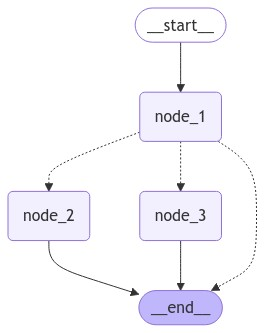

In [13]:
# Build graph
builder = StateGraph(state)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# view
display(Image(graph.get_graph().draw_mermaid_png()))

## Graph Invocation

The compiled graph implements the runnable protocol.

This provides a standard way to execute LangChain components.

invoke is one of the standard methods in this interface.

The input is a dictionary {"graph_state": "Hi, this is lance." }, which sets the initial value for our graph state dict.

When invoke is called, the graph starts execution from the START node.

It progresses through the defined nodes ( node_1, node_2, node_3 ) in order.

The conditional edge will traverse from node 1 to node 2 or 3 using a 50/50 decision rule.

Each node function receives the current state and overrides it.

The execution continues until it reaches the
END node.

In [16]:
graph.invoke({"graph_state" : "Hi this is Manideep."})

-- Node 1 --
-- Node 2 --


{'graph_state': 'Hi this is Manideep.I amhappy !'}